# trim_disconnected_blobs

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.filters.trim_disconnected_blobs))

---
 ## Documentation for ``trim_disconnected_blobs``
 ---
**<span style="color:purple">trim&#95;disconnected&#95;blobs</span>_(im, inlets, strel=None)_**


Removes foreground voxels not connected to specified inlets.


#### Parameters
* im : <b><i>ndarray</i></b>  The image containing the blobs to be trimmed
* inlets : <b><i>ndarray or tuple of indices</i></b>  The locations of the inlets.  Can either be a boolean mask the
	same shape as ``im``, or a tuple of indices such as that returned
	by the ``where`` function.  Any voxels *not* connected directly to
	the inlets will be trimmed.
* strel : <b><i>ndarray</i></b>  The neighborhood over which connectivity should be checked. It
	must be symmetric and the same dimensionality as the image. It is
	passed directly to the ``scipy.ndimage.label`` function as the
	``structure`` argument so refer to that docstring for additional
	info.

#### Returns
* image : <b><i>ndarray</i></b>  An array of the same shape as ``im``, but with all foreground
	voxels not connected to the ``inlets`` removed.
---

## Import packages

In [2]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import scipy
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

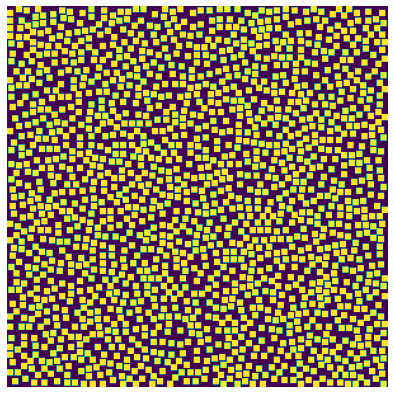

In [3]:
im = np.zeros([300, 300])
#im = ps.generators.RSA(im, radius=25, volume_fraction=0.3)
im = ps.generators.RSA(im, radius=3, volume_fraction=0.7)
inlets = np.zeros([300, 300])
inlets  = ps.generators.RSA(inlets, radius=3, volume_fraction=0.01)

plt.figure(figsize=[7, 7])
plt.imshow(im);
plt.axis(False)

#default values:
strel = None

## Apply filter function:
With different parameters

### inlets

Text(0.5, 1.0, 'inlets = blobs - result')

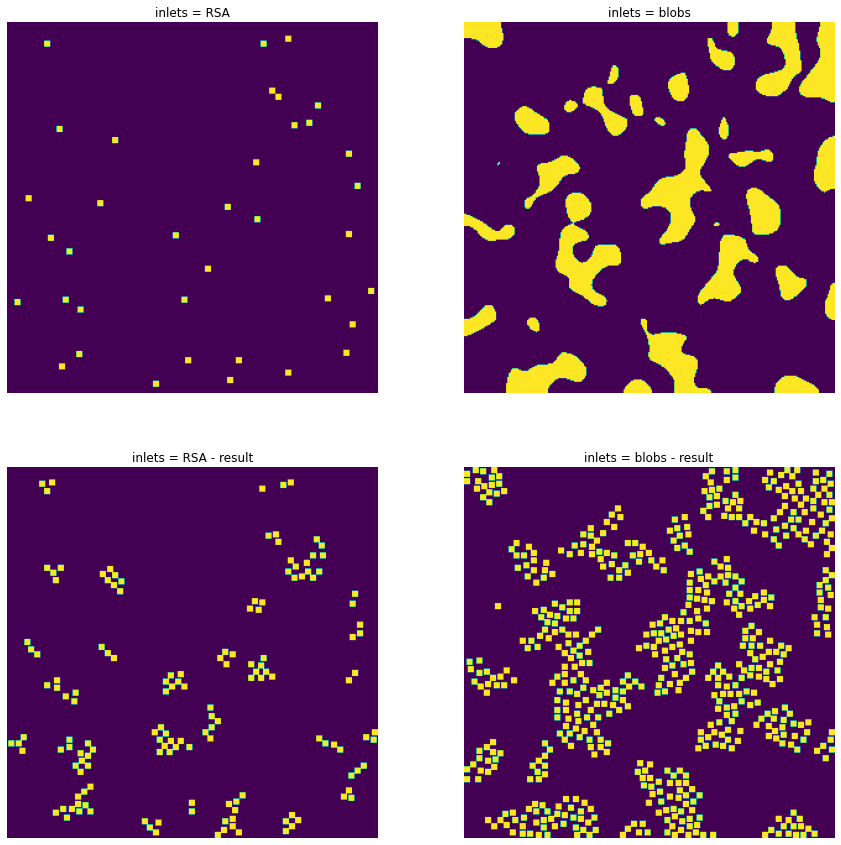

In [4]:
x = ps.filters.trim_disconnected_blobs(im=im, inlets=inlets, strel=strel)

in2  = ps.generators.blobs([300,300], 0.2)
xx = ps.filters.trim_disconnected_blobs(im=im, inlets=in2, strel=strel)

fig, ax = plt.subplots(2, 2, figsize=[15, 15]);
ax[0,0].imshow(inlets);
ax[0,1].imshow(in2);
ax[0,0].axis(False)
ax[0,1].axis(False)
ax[0,0].set_title('inlets = RSA')
ax[0,1].set_title('inlets = blobs')

ax[1,0].imshow(x);
ax[1,1].imshow(xx);
ax[1,0].axis(False)
ax[1,1].axis(False)
ax[1,0].set_title('inlets = RSA - result')
ax[1,1].set_title('inlets = blobs - result')

### strel

Text(0.5, 1.0, 'strel = [100,300]')

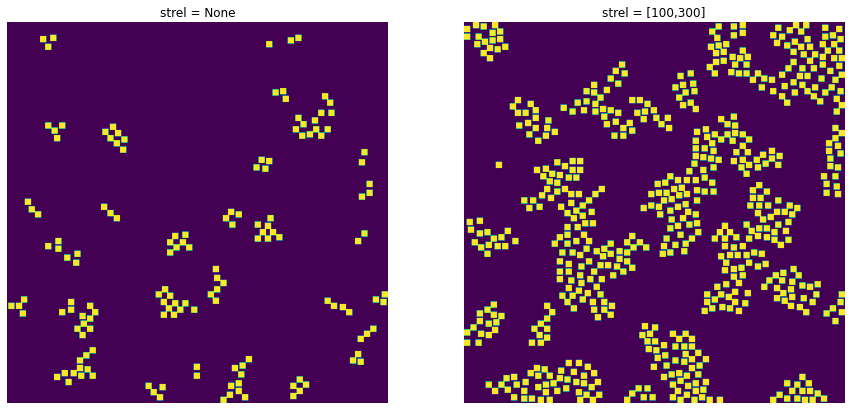

In [5]:
xx = ps.filters.trim_disconnected_blobs(im=im, inlets=in2, strel=[100,300])
fig, ax = plt.subplots(1, 2, figsize=[15, 15]);

ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('strel = None')
ax[1].set_title('strel = [100,300]')